In [63]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [108]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
total = train.append(test,ignore_index=True)

In [51]:
corr = train.corr()

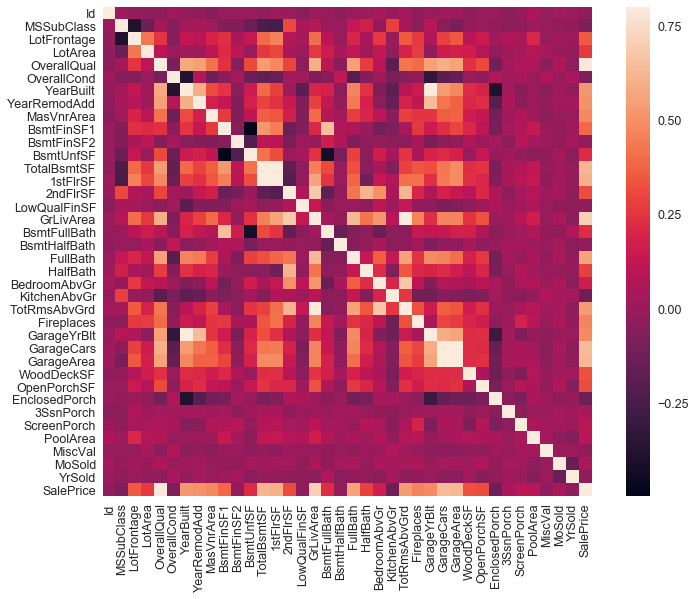

In [52]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

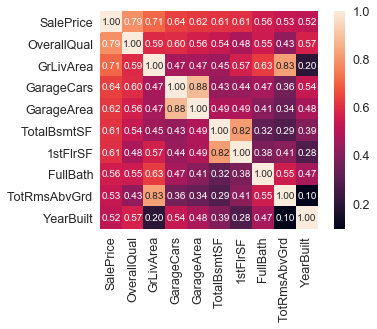

In [53]:
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [55]:
train.drop(['LotFrontage','PoolQC','Fence','MiscFeature','FireplaceQu','Alley','GarageQual','GarageCond','GarageFinish','GarageYrBlt','GarageType','BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual','MasVnrArea','MasVnrType'],axis=1,inplace=True)
train.dropna(inplace=True)

In [87]:
X = np.array(train[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt']])
y = np.array(train[['SalePrice']])

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [89]:
from sklearn.linear_model import Ridge

In [90]:
clf = Ridge(alpha=1.0)
clf.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [91]:
clf.score(X_test,y_test)

0.811744833977319

### Kaggle Submission

In [140]:
test = pd.read_csv('test.csv')

In [134]:
test['GarageCars'] = test['GarageCars'].groupby([test['OverallQual']]).apply(lambda x: x.fillna(x.median()))
test['GarageArea'] = test['GarageArea'].groupby([test['OverallQual']]).apply(lambda x: x.fillna(x.median()))
test['TotalBsmtSF'] = test['TotalBsmtSF'].groupby([test['OverallQual']]).apply(lambda x: x.fillna(x.median()))

In [138]:
X_test = test[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt']]

In [139]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 9 columns):
OverallQual     1459 non-null int64
GrLivArea       1459 non-null int64
GarageCars      1459 non-null float64
GarageArea      1459 non-null float64
TotalBsmtSF     1459 non-null float64
1stFlrSF        1459 non-null int64
FullBath        1459 non-null int64
TotRmsAbvGrd    1459 non-null int64
YearBuilt       1459 non-null int64
dtypes: float64(3), int64(6)
memory usage: 102.7 KB


In [130]:
y = clf.predict(np.array(X_test))

In [131]:
final = pd.DataFrame(test.Id)
final['SalePrice']=y
final.to_csv('house_prices.csv',index=None)

In [132]:
final.shape

(1459, 2)